In [ ]:
 
!pip install 'fsspec>=0.3.3'
!pip install scikit-learn==0.22.1
!pip install scikit-elm==0.21a0

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn import svm
import cv2 as cv
from matplotlib import pyplot as plt
from skelm import ELMClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from skelm import ELMClassifier
#from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

----
----
----
# **Base Classifiers**
----
----
----

# **FOV -1**

(8,)
(8, 4)
(25,)
(25, 4)
ELM_accuracy 0.875
Accuracy__________________________________________________________ :  0.875
Sensitivity__________________________ :  1.0
Specificity :  0.8
precision :  0.75

 [1 1 1 1 0 0 0 0]

 [1 1 1 1 1 0 0 0]


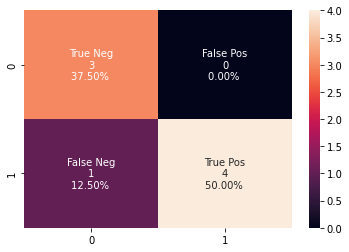

In [ ]:
#cv01
X_train = np.array([ 

#fov -1--1-2
[1024196, 993844, 1011882, 1004404],
[1031796, 921196, 1019681, 990809],
[1037264, 943045, 1021643, 1000010],
[1027594, 975736, 1016537, 1015338],
[1028188, 946219, 1013218, 1005855],
#fov -1--1-3
[1022539, 954371, 1018930, 1000128],
[1036997, 952982, 1014100, 1019177],
[1033350, 932702, 1015732, 1011526],
[1022211, 941742, 1012387, 1002019],
[1029411, 931065, 1009220, 992623],
#fov -1--1-4
[1032787, 955801, 1015789, 1003474],
[1027949, 969408, 1009147, 1012205],
[1024660, 999895, 1009080, 1004446],
[1027497, 935067, 1009041, 1008424],
#########




#fov -1--0-2
[1022017, 910102, 1003322, 1012447],
[1029654, 930834, 1006495, 1016012],
[1020437, 909726, 1010960, 1004448],
#fov -1--0-3
[1019316, 900992, 1005310, 986245],
[1020624, 926431, 1004471, 949516],
[1022063, 925043, 1002409, 984680],
[1015599, 928210, 1008540, 956687],
#fov -1--0-4
[1018504, 910276, 1010307, 984830],
[1014619, 934941, 1010523, 1016805],
[1011513, 930391, 1007784, 1015363],
[1025011, 928975, 1004438, 1002578],

])



X_test = np.array([ 
 #fov -1--1-1
[1027999, 948066, 1007245, 1013792],
[1031840, 950090, 1018965, 1018443],
[1035377, 926628, 1018096, 998295],
[1027900, 909338, 1016274, 1090224],
[1024317, 940223, 1009202, 1002757],
#fov -1--0-1
[1018451, 916096, 1010825, 1002320],
[1020788, 936743, 1010915, 1013660],
[1020364, 930546, 1007603, 1016641],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1,
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1,1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1e-5, n_neurons=94, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_pred = ELM_model.predict(X_test)
###
fov_1__1 = ELM_model.predict_proba(X_test)
###
ELM_accuracy = ELM_model.score(X_test , y_test)
print("ELM_accuracy", ELM_accuracy)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)
cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

(8,)
(8, 4)
(25,)
(25, 4)
ELM_accuracy 1.0
Accuracy__________________________________________________________ :  1.0
Sensitivity__________________________ :  1.0
Specificity :  1.0
precision :  1.0

 [1 1 1 1 1 0 0 0]

 [1 1 1 1 1 0 0 0]


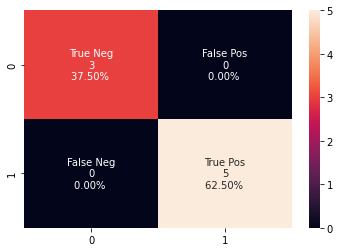

In [ ]:
#cv02
X_train = np.array([ 
 #fov -1--1-1
[1027999, 948066, 1007245, 1013792],
[1031840, 950090, 1018965, 1018443],
[1035377, 926628, 1018096, 998295],
[1027900, 909338, 1016274, 1090224],
[1024317, 940223, 1009202, 1002757],

#fov -1--1-3
[1022539, 954371, 1018930, 1000128],
[1036997, 952982, 1014100, 1019177],
[1033350, 932702, 1015732, 1011526],
[1022211, 941742, 1012387, 1002019],
[1029411, 931065, 1009220, 992623],
#fov -1--1-4
[1032787, 955801, 1015789, 1003474],
[1027949, 969408, 1009147, 1012205],
[1024660, 999895, 1009080, 1004446],
[1027497, 935067, 1009041, 1008424],
#########



#fov -1--0-1
[1018451, 916096, 1010825, 1002320],
[1020788, 936743, 1010915, 1013660],
[1020364, 930546, 1007603, 1016641],

#fov -1--0-3
[1019316, 900992, 1005310, 986245],
[1020624, 926431, 1004471, 949516],
[1022063, 925043, 1002409, 984680],
[1015599, 928210, 1008540, 956687],
#fov -1--0-4
[1018504, 910276, 1010307, 984830],
[1014619, 934941, 1010523, 1016805],
[1011513, 930391, 1007784, 1015363],
[1025011, 928975, 1004438, 1002578],

])



X_test = np.array([ 

#fov -1--1-2
[1024196, 993844, 1011882, 1004404],
[1031796, 921196, 1019681, 990809],
[1037264, 943045, 1021643, 1000010],
[1027594, 975736, 1016537, 1015338],
[1028188, 946219, 1013218, 1005855],

#fov -1--0-2
[1022017, 910102, 1003322, 1012447],
[1029654, 930834, 1006495, 1016012],
[1020437, 909726, 1010960, 1004448],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1,
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1,1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1e-5, n_neurons=94, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_pred = ELM_model.predict(X_test)

###
fov_1__2 = ELM_model.predict_proba(X_test)
###
ELM_accuracy = ELM_model.score(X_test , y_test)
print("ELM_accuracy", ELM_accuracy)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
#cv02

(9,)
(9, 4)
(24,)
(24, 4)
ELM_accuracy 0.8888888888888888
Accuracy__________________________________________________________ :  0.8888888888888888
Sensitivity__________________________ :  1.0
Specificity :  0.8
precision :  0.8
precision :  0.8

 [1 1 1 0 1 0 0 0 0]

 [1 1 1 1 1 0 0 0 0]


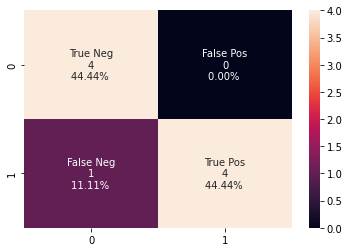

In [ ]:
#cv03
X_train = np.array([ 
 #fov -1--1-1
[1027999, 948066, 1007245, 1013792],
[1031840, 950090, 1018965, 1018443],
[1035377, 926628, 1018096, 998295],
[1027900, 909338, 1016274, 1090224],
[1024317, 940223, 1009202, 1002757],
#fov -1--1-2
[1024196, 993844, 1011882, 1004404],
[1031796, 921196, 1019681, 990809],
[1037264, 943045, 1021643, 1000010],
[1027594, 975736, 1016537, 1015338],
[1028188, 946219, 1013218, 1005855],

#fov -1--1-4
[1032787, 955801, 1015789, 1003474],
[1027949, 969408, 1009147, 1012205],
[1024660, 999895, 1009080, 1004446],
[1027497, 935067, 1009041, 1008424],
#########



#fov -1--0-1
[1018451, 916096, 1010825, 1002320],
[1020788, 936743, 1010915, 1013660],
[1020364, 930546, 1007603, 1016641],
#fov -1--0-2
[1022017, 910102, 1003322, 1012447],
[1029654, 930834, 1006495, 1016012],
[1020437, 909726, 1010960, 1004448],

#fov -1--0-4
[1018504, 910276, 1010307, 984830],
[1014619, 934941, 1010523, 1016805],
[1011513, 930391, 1007784, 1015363],
[1025011, 928975, 1004438, 1002578],

])

X_test = np.array([ 
#fov -1--1-3
[1022539, 954371, 1018930, 1000128],
[1036997, 952982, 1014100, 1019177],
[1033350, 932702, 1015732, 1011526],
[1022211, 941742, 1012387, 1002019],
[1029411, 931065, 1009220, 992623],

#fov -1--0-3
[1019316, 900992, 1005310, 986245],
[1020624, 926431, 1004471, 949516],
[1022063, 925043, 1002409, 984680],
[1015599, 928210, 1008540, 956687],
])


y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 
0,0, 0,0,0, 0,0,0, 0,0,
])
y_test = np.array([    
1,1,1,1,1, 0,0,0,0, 
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################
ELM_model = ELMClassifier(alpha=1e-7, n_neurons=90, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_pred = ELM_model.predict(X_test)
###
fov_1__3= ELM_model.predict_proba(X_test)
###
ELM_accuracy = ELM_model.score(X_test , y_test)
print("ELM_accuracy", ELM_accuracy)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)
cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
#cv03

(8,)
(8, 4)
(25,)
(25, 4)
ELM_accuracy 0.75
Accuracy__________________________________________________________ :  0.75
Sensitivity__________________________ :  0.75
Specificity :  0.75
precision :  0.75
precision :  0.75

 [1 1 1 0 0 1 0 0]

 [1 1 1 1 0 0 0 0]


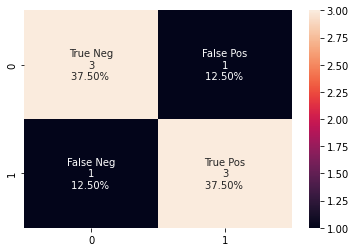

In [ ]:
#cv04

[1015599, 928210, 1008540, 956687],
[1020437, 909726, 1010960, 1004448],
#fov -1--0-3
[1019316, 900992, 1005310, 986245],
[1020624, 926431, 1004471, 949516],
[1022063, 925043, 1002409, 984680],
[1025011, 928975, 1004438, 1002578],



])



X_test = np.array([ 
                   
#fov -1--1-4
[1022539, 954371, 1018930, 1000128],
[1036997, 952982, 1014100, 1019177],
[1033350, 932702, 1015732, 1011526],
[1022211, 941742, 1012387, 1002019],
#fov -1--0-4
[1022017, 910102, 1003322, 1012447],
[1029654, 930834, 1006495, 1016012],
[1018504, 910276, 1010307, 984830],
[1011513, 930391, 1007784, 1015363],

])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 
0,0, 0,0,0, 0,0,0, 0,0,0,
])
y_test = np.array([    
1,1,1,1, 0,0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################

ELM_model = ELMClassifier(alpha=1e-5, n_neurons=94, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_pred = ELM_model.predict(X_test)
###
fov_1__4 = ELM_model.predict_proba(X_test)
###
ELM_accuracy = ELM_model.score(X_test , y_test)
print("ELM_accuracy", ELM_accuracy)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)
cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
#cv04

In [ ]:
fov_1 =[]
fov_1 = np.concatenate((fov_1__0, fov_1__1, fov_1__2, fov_1__3, fov_1__4))

fov_1_cv_0 = np.concatenate((fov_1__1, fov_1__2, fov_1__3, fov_1__4))
fov_1_cv_1 = np.concatenate((fov_1__0, fov_1__2, fov_1__3, fov_1__4))
fov_1_cv_2 = np.concatenate((fov_1__1, fov_1__0, fov_1__3, fov_1__4))
fov_1_cv_3 = np.concatenate((fov_1__1, fov_1__2, fov_1__0, fov_1__4))
fov_1_cv_4 = np.concatenate((fov_1__1, fov_1__2, fov_1__3, fov_1__0))


print('\n cv00 \n',fov_1__0)
print('\n cv01 \n',fov_1__1)
print('\n cv02 \n',fov_1__2)
print('\n cv03 \n',fov_1__3)
print('\n cv04 \n',fov_1__4)


 cv00 
 [[0.37684735 0.62315265]
 [0.31433068 0.68566932]
 [0.34917991 0.65082009]
 [0.38638802 0.61361198]
 [0.46125608 0.53874392]
 [0.54300918 0.45699082]
 [0.44137508 0.55862492]]

 cv01 
 [[0.33965922 0.66034078]
 [0.2372896  0.7627104 ]
 [0.27599967 0.72400033]
 [0.00244928 0.99755072]
 [0.45929307 0.54070693]
 [0.3860161  0.6139839 ]
 [0.43226235 0.56773765]]

 cv02 
 [[0.24588067 0.75411933]
 [0.28513779 0.71486221]
 [0.19798666 0.80201334]
 [0.23262388 0.76737612]
 [0.46722981 0.53277019]
 [0.35687209 0.64312791]
 [0.44480019 0.55519981]]

 cv03 
 [[0.3184654  0.6815346 ]
 [0.23024354 0.76975646]
 [0.29866851 0.70133149]
 [0.37412034 0.62587966]
 [0.53548777 0.46451223]
 [0.40209977 0.59790023]
 [0.43802721 0.56197279]]

 cv04 
 [[0.24526329 0.75473671]
 [0.29019426 0.70980574]
 [0.2511269  0.7488731 ]
 [0.47945659 0.52054341]
 [0.4598958  0.5401042 ]]


# **FOV**

(8,)
(8, 4)
(25,)
(25, 4)
Accuracy__________________________________________________________ :  1.0
Sensitivity__________________________ :  1.0
Specificity :  1.0
precision :  1.0

 [1 1 1 1 1 0 0 0]

 [1 1 1 1 1 0 0 0]


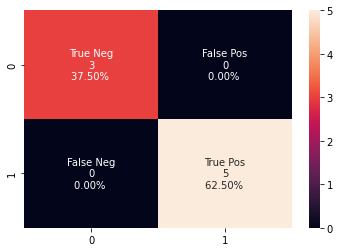

In [ ]:
#cv1
X_train = np.array([ 

#fov 0--1-2
[1022416, 935610, 1004085, 1007584],
[1033111, 955280, 1012878, 1013562],
[1029304, 934460, 999529, 990589],
[1026579, 930500, 1013988, 999436],
[1029090, 959550, 1021896, 1007238],
#fov 0--1-3
[1025546, 953359, 1019302, 1002407],
[1034440, 945551, 1025909, 1011441],
[1041213, 932578, 1020941, 1004257],
[1024395, 941172, 1012760, 1005413],
[1026377, 1004482, 1003000, 1002197],
#fov 0--1-4
[1025773, 999257, 1009806, 1010753],
[1030471, 930867, 1015793, 1003548],
[1038700, 942136, 1020288, 1005458],
[1042752, 977096, 1015613, 1014312],


############



#fov 0--0-2
[1022014, 917434, 1015543, 1006612],
[1022316, 929923, 1010124, 1013671],
[1021365, 918095, 1017004, 999530],
[1016971, 929698, 1017565, 958147],
#fov 0--0-3
[1020656, 911839, 998187, 1007790],
[1023652, 929505, 1007357, 1010827],
[1023326, 926674, 996021, 1005863],
#fov 0--0-4
[1017237, 916967, 1010456, 992229],
[1015978, 943634, 1009369, 1018878],
[1020969, 924798, 1011225, 1012933],
[1022358, 927367, 1023832, 1006312],
])



X_test = np.array([ 
#fov 0--1-1
[1033878, 941345, 1006577, 1017180],
[1031428, 960730, 1017799, 1013729],
[1039283, 937450, 1014448, 1005595],
[1028922, 937417, 1022528, 982567],
[1018201, 973985, 1012629, 999104],
#fov 0--0-1
[1022176, 923386, 1009036, 1014409],
[1022454, 930755, 1017295, 1019159],
[1023228, 927585, 1019025, 1008570],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1,1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.7e-4, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
###
fov_0__1 = ELM_model.predict_proba(X_test)
#print(fov_0__1)
###
#print (cf_matrix)
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv1

(9,)
(9, 4)
(24,)
(24, 4)
Accuracy__________________________________________________________ :  0.7777777777777778
Sensitivity__________________________ :  0.75
Specificity :  0.8
precision :  0.75

 [0 1 1 1 1 0 0 0 1]

 [1 1 1 1 1 0 0 0 0]


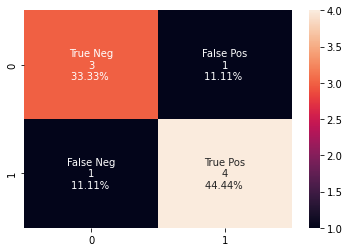

In [ ]:
#cv2
X_train = np.array([ ######
#fov 0--1-1
[1033878, 941345, 1006577, 1017180],
[1031428, 960730, 1017799, 1013729],
[1039283, 937450, 1014448, 1005595],
[1028922, 937417, 1022528, 982567],
[1018201, 973985, 1012629, 999104],

#fov 0--1-3
[1025546, 953359, 1019302, 1002407],
[1034440, 945551, 1025909, 1011441],
[1041213, 932578, 1020941, 1004257],
[1024395, 941172, 1012760, 1005413],
[1026377, 1004482, 1003000, 1002197],
#fov 0--1-4
[1025773, 999257, 1009806, 1010753],
[1030471, 930867, 1015793, 1003548],
[1038700, 942136, 1020288, 1005458],
[1042752, 977096, 1015613, 1014312],


############


#fov 0--0-1
[1022176, 923386, 1009036, 1014409],
[1022454, 930755, 1017295, 1019159],
[1023228, 927585, 1019025, 1008570],

#fov 0--0-3
[1020656, 911839, 998187, 1007790],
[1023652, 929505, 1007357, 1010827],
[1023326, 926674, 996021, 1005863],
#fov 0--0-4
[1017237, 916967, 1010456, 992229],
[1015978, 943634, 1009369, 1018878],
[1020969, 924798, 1011225, 1012933],
[1022358, 927367, 1023832, 1006312],
])



X_test = np.array([ 
#fov 0--1-2
[1022416, 935610, 1004085, 1007584],
[1033111, 955280, 1012878, 1013562],
[1029304, 934460, 999529, 990589],
[1026579, 930500, 1013988, 999436],
[1029090, 959550, 1021896, 1007238],
#fov 0--0-2
[1022014, 917434, 1015543, 1006612],
[1022316, 929923, 1010124, 1013671],
[1021365, 918095, 1017004, 999530],
[1016971, 929698, 1017565, 958147],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 
0,0, 0,0,0, 0,0,0, 0,0,
])
y_test = np.array([    
1,1,1, 1,1, 0,0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.7e-3, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov_0__2 = ELM_model.predict_proba(X_test)

###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv2

(8,)
(8, 4)
(25,)
(25, 4)
Accuracy__________________________________________________________ :  0.875
Sensitivity__________________________ :  0.6666666666666666
Specificity :  1.0
precision :  1.0

 [1 1 1 1 1 0 0 1]

 [1 1 1 1 1 0 0 0]


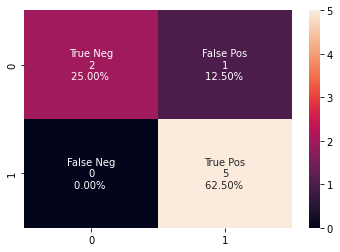

In [ ]:
#cv3
X_train = np.array([ 
######
#fov 0--1-1
[1033878, 941345, 1006577, 1017180],
[1031428, 960730, 1017799, 1013729],
[1039283, 937450, 1014448, 1005595],
[1028922, 937417, 1022528, 982567],
[1018201, 973985, 1012629, 999104],
#fov 0--1-2
[1022416, 935610, 1004085, 1007584],
[1033111, 955280, 1012878, 1013562],
[1029304, 934460, 999529, 990589],
[1026579, 930500, 1013988, 999436],
[1029090, 959550, 1021896, 1007238],

#fov 0--1-4
[1025773, 999257, 1009806, 1010753],
[1030471, 930867, 1015793, 1003548],
[1038700, 942136, 1020288, 1005458],
[1042752, 977096, 1015613, 1014312],


############


#fov 0--0-1
[1022176, 923386, 1009036, 1014409],
[1022454, 930755, 1017295, 1019159],
[1023228, 927585, 1019025, 1008570],
#fov 0--0-2
[1022014, 917434, 1015543, 1006612],
[1022316, 929923, 1010124, 1013671],
[1021365, 918095, 1017004, 999530],
[1016971, 929698, 1017565, 958147],

#fov 0--0-4
[1017237, 916967, 1010456, 992229],
[1015978, 943634, 1009369, 1018878],
[1020969, 924798, 1011225, 1012933],
[1022358, 927367, 1023832, 1006312],
])



X_test = np.array([ 
#fov 0--1-3
[1025546, 953359, 1019302, 1002407],
[1034440, 945551, 1025909, 1011441],
[1041213, 932578, 1020941, 1004257],
[1024395, 941172, 1012760, 1005413],
[1026377, 1004482, 1003000, 1002197],

#fov 0--0-3
[1020656, 911839, 998187, 1007790],
[1023652, 929505, 1007357, 1010827],
[1023326, 926674, 996021, 1005863],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1,1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=3e-4, n_neurons=97, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov_0__3 = ELM_model.predict_proba(X_test)

###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv3

(8,)
(8, 4)
(25,)
(25, 4)
Accuracy__________________________________________________________ :  1.0
Sensitivity__________________________ :  1.0
Specificity :  1.0
precision :  1.0

 [1 1 1 1 0 0 0 0]

 [1 1 1 1 0 0 0 0]


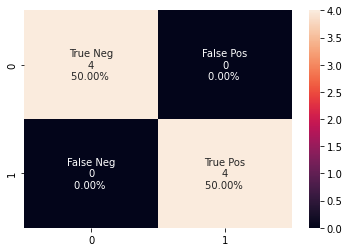

In [ ]:
#cv4
X_train = np.array([ ######
#fov 0--1-1
[1033878, 941345, 1006577, 1017180],
[1031428, 960730, 1017799, 1013729],
[1039283, 937450, 1014448, 1005595],
[1028922, 937417, 1022528, 982567],
[1018201, 973985, 1012629, 999104],
#fov 0--1-2
[1022416, 935610, 1004085, 1007584],
[1033111, 955280, 1012878, 1013562],
[1029304, 934460, 999529, 990589],
[1026579, 930500, 1013988, 999436],
[1029090, 959550, 1021896, 1007238],
#fov 0--1-3
[1025546, 953359, 1019302, 1002407],
[1034440, 945551, 1025909, 1011441],
[1041213, 932578, 1020941, 1004257],
[1024395, 941172, 1012760, 1005413],
[1026377, 1004482, 1003000, 1002197],



############


#fov 0--0-1
[1022176, 923386, 1009036, 1014409],
[1022454, 930755, 1017295, 1019159],
[1023228, 927585, 1019025, 1008570],
#fov 0--0-2
[1022014, 917434, 1015543, 1006612],
[1022316, 929923, 1010124, 1013671],
[1021365, 918095, 1017004, 999530],
[1016971, 929698, 1017565, 958147],
#fov 0--0-3
[1020656, 911839, 998187, 1007790],
[1023652, 929505, 1007357, 1010827],
[1023326, 926674, 996021, 1005863],

])



X_test = np.array([ 
#fov 0--1-4
[1025773, 999257, 1009806, 1010753],
[1030471, 930867, 1015793, 1003548],
[1038700, 942136, 1020288, 1005458],
[1042752, 977096, 1015613, 1014312],
#fov 0--0-4
[1017237, 916967, 1010456, 992229],
[1015978, 943634, 1009369, 1018878],
[1020969, 924798, 1011225, 1012933],
[1022358, 927367, 1023832, 1006312],

])


y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 1,
0,0, 0,0,0, 0,0,0, 0,0,
])
y_test = np.array([    
1,1,1,1, 0,0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.4e-8, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov_0__4 = ELM_model.predict_proba(X_test)

###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv4

In [ ]:
fov0 =[]


fov0  = np.concatenate((fov_0__0, fov_0__1, fov_0__2, fov_0__3, fov_0__4))

fov0_cv_0 = np.concatenate((fov_0__1, fov_0__2, fov_0__3, fov_0__4))
fov0_cv_1 = np.concatenate((fov_0__0, fov_0__2, fov_0__3, fov_0__4))
fov0_cv_2 = np.concatenate((fov_0__1, fov_0__0, fov_0__3, fov_0__4))
fov0_cv_3 = np.concatenate((fov_0__1, fov_0__2, fov_0__0, fov_0__4))
fov0_cv_4 = np.concatenate((fov_0__1, fov_0__2, fov_0__3, fov_0__0))




print('\n cv00 \n',fov_0__0)
print('\n cv01 \n',fov_0__1)
print('\n cv02 \n',fov_0__2)
print('\n cv03 \n',fov_0__3)
print('\n cv04 \n',fov_0__4)


 cv00 
 [[0.43993766 0.56006234]
 [0.30463934 0.69536066]
 [0.34885659 0.65114341]
 [0.36622032 0.63377968]
 [0.29455952 0.70544048]
 [0.48712304 0.51287696]
 [0.41431194 0.58568806]]

 cv01 
 [[0.35097434 0.64902566]
 [0.27739249 0.72260751]
 [0.2517753  0.7482247 ]
 [0.31371926 0.68628074]
 [0.44525506 0.55474494]
 [0.45691735 0.54308265]
 [0.46686269 0.53313731]]

 cv02 
 [[0.21676306 0.78323694]
 [0.33697507 0.66302493]
 [0.23519289 0.76480711]
 [0.14706183 0.85293817]
 [0.47753116 0.52246884]
 [0.44427479 0.55572521]
 [0.47104924 0.52895076]]

 cv03 
 [[0.30709024 0.69290976]
 [0.28307038 0.71692962]
 [0.30469869 0.69530131]
 [0.3121355  0.6878645 ]
 [0.55540038 0.44459962]
 [0.42267253 0.57732747]
 [0.37643752 0.62356248]]

 cv04 
 [[0.26375932 0.73624068]
 [0.34887283 0.65112717]
 [0.33261073 0.66738927]
 [0.44919838 0.55080162]
 [0.45499364 0.54500636]]


# **FOV +1**

(7,)
(7, 4)
(26,)
(26, 4)
[[0.39262708 0.60737292]
 [0.2661347  0.7338653 ]
 [0.36574425 0.63425575]
 [0.35542274 0.64457726]
 [0.52384166 0.47615834]
 [0.40640591 0.59359409]
 [0.394843   0.605157  ]]
Accuracy__________________________________________________________ :  0.8571428571428571
Sensitivity__________________________ :  1.0
Specificity :  0.75
precision :  0.75

 [0 1 1 1 0 0 0]

 [1 1 1 1 0 0 0]


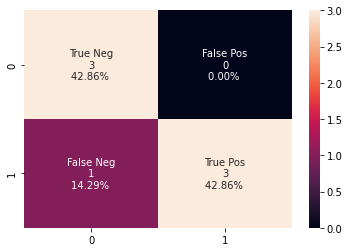

In [ ]:
#cv00
X_train = np.array([ 


#fov +1--1-1
[1030338, 941307, 1008730, 1017060],
[1025731, 956330, 1014512, 1013756],
[1031313, 929693, 1016035, 1000237],
[1028893, 930152, 1018624, 999618],
#fov +1--1-2
[1028490, 996811, 1012029, 1007571],
[1028833, 928250, 1017838, 1004832],
[1035427, 945976, 1012568, 1013640],
[1036092, 976870, 1016870, 1014732],
#fov +1--1-3
[1025631, 955342, 1016810, 1009132],
[1041056, 938759, 1026473, 1002682],
[1025221, 954078, 1014793, 1012724],
[1019608, 931336, 1011259, 1002825],
#fov +1--1-4
[1030516, 963487, 1016191, 1012147],
[1026075, 963697, 1012670, 1008239],
[1032920, 993803, 996715, 1006099],


#fov +1--0-1
[1018276, 926852, 1010244, 1017572],
[1010282, 927528, 1005359, 1015597],
[1020722, 928688, 1001077, 1013286],
#fov +1--0-2
[1010853, 924336, 1012619, 995235],
[1027002, 921682, 1001064, 993281],
[1012567, 916764, 1008585, 990393],
#fov +1--0-3
[1019926, 950886, 1003846, 1020764],
[1010021, 915155, 1005609, 1012200],
[1015589, 919801, 1003413, 986084],
#fov +1--0-4
[1015308, 920937, 1006560, 962967],
[1014436, 930120, 1001470, 1004566],
])



X_test = np.array([ 
#fov +1--1-0
[1026296, 928901, 1007002, 1006271],
[1032784, 947660, 1015682, 1006965],
[1026854, 928033, 1009969, 999172],
[1030349, 929082, 1009032, 1004050],

#fov +1--0-0
[1022572, 903100, 1002178, 1006875],
[1024201, 931401, 1005678, 1007513],
[1026067, 924579, 1010799, 1015190],

])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 1,
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.7e-4, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov__1__0 = ELM_model.predict_proba(X_test)
print(fov__1__0)
###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv0

(7,)
(7, 4)
(26,)
(26, 4)
[[0.31966784 0.68033216]
 [0.31261329 0.68738671]
 [0.30566584 0.69433416]
 [0.29666189 0.70333811]
 [0.42105305 0.57894695]
 [0.5061012  0.4938988 ]
 [0.43827423 0.56172577]]
Accuracy__________________________________________________________ :  1.0
Sensitivity__________________________ :  1.0
Specificity :  1.0
precision :  1.0

 [1 1 1 1 0 0 0]

 [1 1 1 1 0 0 0]


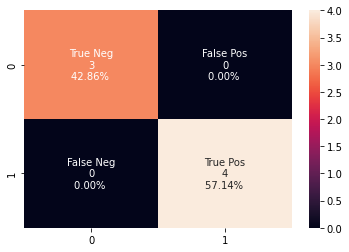

In [ ]:
#cv01
X_train = np.array([ 

#fov +1--1-0
[1026296, 928901, 1007002, 1006271],
[1032784, 947660, 1015682, 1006965],
[1026854, 928033, 1009969, 999172],
[1030349, 929082, 1009032, 1004050],
#fov +1--1-2
[1028490, 996811, 1012029, 1007571],
[1028833, 928250, 1017838, 1004832],
[1035427, 945976, 1012568, 1013640],
[1036092, 976870, 1016870, 1014732],
#fov +1--1-3
[1025631, 955342, 1016810, 1009132],
[1041056, 938759, 1026473, 1002682],
[1025221, 954078, 1014793, 1012724],
[1019608, 931336, 1011259, 1002825],
#fov +1--1-4
[1030516, 963487, 1016191, 1012147],
[1026075, 963697, 1012670, 1008239],
[1032920, 993803, 996715, 1006099],


#fov +1--0-0
[1022572, 903100, 1002178, 1006875],
[1024201, 931401, 1005678, 1007513],
[1026067, 924579, 1010799, 1015190],
#fov +1--0-2
[1010853, 924336, 1012619, 995235],
[1027002, 921682, 1001064, 993281],
[1012567, 916764, 1008585, 990393],
#fov +1--0-3
[1019926, 950886, 1003846, 1020764],
[1010021, 915155, 1005609, 1012200],
[1015589, 919801, 1003413, 986084],
#fov +1--0-4
[1015308, 920937, 1006560, 962967],
[1014436, 930120, 1001470, 1004566],
])



X_test = np.array([ 

#fov +1--1-1
[1030338, 941307, 1008730, 1017060],
[1025731, 956330, 1014512, 1013756],
[1031313, 929693, 1016035, 1000237],
[1028893, 930152, 1018624, 999618],

#fov +1--0-1
[1018276, 926852, 1010244, 1017572],
[1010282, 927528, 1005359, 1015597],
[1020722, 928688, 1001077, 1013286],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 1,
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.7e-4, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov__1__1 = ELM_model.predict_proba(X_test)
print(fov__1__1)
###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')


#cv01

(7,)
(7, 4)
(26,)
(26, 4)
[[0.21172029 0.78827971]
 [0.30656506 0.69343494]
 [0.26573563 0.73426437]
 [0.194364   0.805636  ]
 [0.45348224 0.54651776]
 [0.4083634  0.5916366 ]
 [0.47673027 0.52326973]]
Accuracy__________________________________________________________ :  1.0
Sensitivity__________________________ :  1.0
Specificity :  1.0
precision :  1.0

 [1 1 1 1 0 0 0]

 [1 1 1 1 0 0 0]


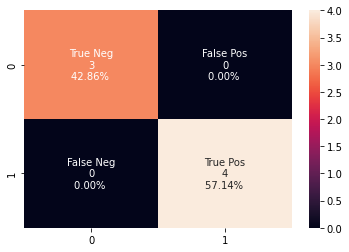

In [ ]:
#cv02
X_train = np.array([ 

#fov +1--1-0
[1026296, 928901, 1007002, 1006271],
[1032784, 947660, 1015682, 1006965],
[1026854, 928033, 1009969, 999172],
[1030349, 929082, 1009032, 1004050],
#fov +1--1-1
[1030338, 941307, 1008730, 1017060],
[1025731, 956330, 1014512, 1013756],
[1031313, 929693, 1016035, 1000237],
[1028893, 930152, 1018624, 999618],
#fov +1--1-3
[1025631, 955342, 1016810, 1009132],
[1041056, 938759, 1026473, 1002682],
[1025221, 954078, 1014793, 1012724],
[1019608, 931336, 1011259, 1002825],
#fov +1--1-4
[1030516, 963487, 1016191, 1012147],
[1026075, 963697, 1012670, 1008239],
[1032920, 993803, 996715, 1006099],


#fov +1--0-0
[1022572, 903100, 1002178, 1006875],
[1024201, 931401, 1005678, 1007513],
[1026067, 924579, 1010799, 1015190],
#fov +1--0-1
[1018276, 926852, 1010244, 1017572],
[1010282, 927528, 1005359, 1015597],
[1020722, 928688, 1001077, 1013286],
#fov +1--0-3
[1019926, 950886, 1003846, 1020764],
[1010021, 915155, 1005609, 1012200],
[1015589, 919801, 1003413, 986084],
#fov +1--0-4
[1015308, 920937, 1006560, 962967],
[1014436, 930120, 1001470, 1004566],
])



X_test = np.array([ 

#fov +1--1-2
[1028490, 996811, 1012029, 1007571],
[1028833, 928250, 1017838, 1004832],
[1035427, 945976, 1012568, 1013640],
[1036092, 976870, 1016870, 1014732],

#fov +1--0-2
[1010853, 924336, 1012619, 995235],
[1027002, 921682, 1001064, 993281],
[1012567, 916764, 1008585, 990393],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 1,
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.7e-4, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov__1__2 = ELM_model.predict_proba(X_test)
print(fov__1__2)
###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)


cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv02

(7,)
(7, 4)
(26,)
(26, 4)
[[0.29058871 0.70941129]
 [0.17066619 0.82933381]
 [0.31259243 0.68740757]
 [0.40063532 0.59936468]
 [0.44207243 0.55792757]
 [0.57218843 0.42781157]
 [0.47159206 0.52840794]]
Accuracy__________________________________________________________ :  0.8571428571428571
Sensitivity__________________________ :  1.0
Specificity :  0.75
precision :  0.75

 [1 1 1 0 0 0 0]

 [1 1 1 1 0 0 0]


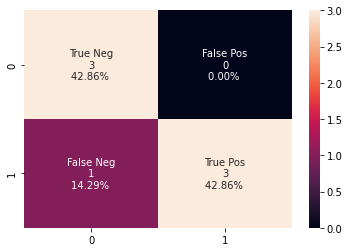

In [ ]:
#cv03
X_train = np.array([ 

#fov +1--1-0
[1026296, 928901, 1007002, 1006271],
[1032784, 947660, 1015682, 1006965],
[1026854, 928033, 1009969, 999172],
[1030349, 929082, 1009032, 1004050],
#fov +1--1-1
[1030338, 941307, 1008730, 1017060],
[1025731, 956330, 1014512, 1013756],
[1031313, 929693, 1016035, 1000237],
[1028893, 930152, 1018624, 999618],
#fov +1--1-2
[1028490, 996811, 1012029, 1007571],
[1028833, 928250, 1017838, 1004832],
[1035427, 945976, 1012568, 1013640],
[1036092, 976870, 1016870, 1014732],
#fov +1--1-4
[1030516, 963487, 1016191, 1012147],
[1026075, 963697, 1012670, 1008239],
[1032920, 993803, 996715, 1006099],


#fov +1--0-0
[1022572, 903100, 1002178, 1006875],
[1024201, 931401, 1005678, 1007513],
[1026067, 924579, 1010799, 1015190],
#fov +1--0-1
[1018276, 926852, 1010244, 1017572],
[1010282, 927528, 1005359, 1015597],
[1020722, 928688, 1001077, 1013286],
#fov +1--0-2
[1010853, 924336, 1012619, 995235],
[1027002, 921682, 1001064, 993281],
[1012567, 916764, 1008585, 990393],
#fov +1--0-4
[1015308, 920937, 1006560, 962967],
[1014436, 930120, 1001470, 1004566],
])



X_test = np.array([ 

#fov +1--1-3
[1025631, 955342, 1016810, 1009132],
[1041056, 938759, 1026473, 1002682],
[1025221, 954078, 1014793, 1012724],
[1019608, 931336, 1011259, 1002825],

#fov +1--0-3
[1019926, 950886, 1003846, 1020764],
[1010021, 915155, 1005609, 1012200],
[1015589, 919801, 1003413, 986084],
])

y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 1,
0,0, 0,0,0, 0,0,0, 0,0,0, 
])
y_test = np.array([    
1,1,1, 1, 0,0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.7e-4, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov__1__3 = ELM_model.predict_proba(X_test)
print(fov__1__3)
###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv03

(5,)
(5, 4)
(28,)
(28, 4)
[[0.26331468 0.73668532]
 [0.3044353  0.6955647 ]
 [0.32590253 0.67409747]
 [0.42197824 0.57802176]
 [0.49941816 0.50058184]]
Accuracy__________________________________________________________ :  1.0
Sensitivity__________________________ :  1.0
Specificity :  1.0
precision :  1.0

 [1 1 1 0 0]

 [1 1 1 0 0]


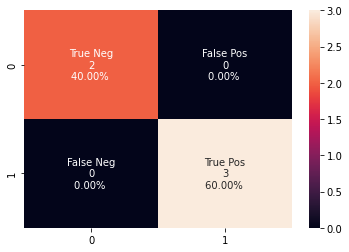

In [ ]:
#cv04
X_train = np.array([ 
#fov +1--1-0
[1026296, 928901, 1007002, 1006271],
[1032784, 947660, 1015682, 1006965],
[1026854, 928033, 1009969, 999172],
[1030349, 929082, 1009032, 1004050],
#fov +1--1-1
[1030338, 941307, 1008730, 1017060],
[1025731, 956330, 1014512, 1013756],
[1031313, 929693, 1016035, 1000237],
[1028893, 930152, 1018624, 999618],
#fov +1--1-2
[1028490, 996811, 1012029, 1007571],
[1028833, 928250, 1017838, 1004832],
[1035427, 945976, 1012568, 1013640],
[1036092, 976870, 1016870, 1014732],
#fov +1--1-3
[1025631, 955342, 1016810, 1009132],
[1041056, 938759, 1026473, 1002682],
[1025221, 954078, 1014793, 1012724],
[1019608, 931336, 1011259, 1002825],


#fov +1--0-0
[1022572, 903100, 1002178, 1006875],
[1024201, 931401, 1005678, 1007513],
[1026067, 924579, 1010799, 1015190],
#fov +1--0-1
[1018276, 926852, 1010244, 1017572],
[1010282, 927528, 1005359, 1015597],
[1020722, 928688, 1001077, 1013286],
#fov +1--0-2
[1010853, 924336, 1012619, 995235],
[1027002, 921682, 1001064, 993281],
[1012567, 916764, 1008585, 990393],
#fov +1--0-3
[1019926, 950886, 1003846, 1020764],
[1010021, 915155, 1005609, 1012200],
[1015589, 919801, 1003413, 986084],
])



X_test = np.array([ 

#fov +1--1-4
[1030516, 963487, 1016191, 1012147],
[1026075, 963697, 1012670, 1008239],
[1032920, 993803, 996715, 1006099],
#fov +1--0-4
[1015308, 920937, 1006560, 962967],
[1014436, 930120, 1001470, 1004566],

])


y_train = np.array([    
1,1,1, 1,1,1, 1,1,1, 1,1,1, 1,1, 1,1,
0,0, 0,0,0, 0,0,0, 0,0,0,0,
])
y_test = np.array([    
1,1,1, 0,0,
])

print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)


###############################


ELM_model = ELMClassifier(alpha=1.7e-4, n_neurons=79, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
#print (cf_matrix)
###
fov__1__4 = ELM_model.predict_proba(X_test)
print(fov__1__4)
###
print ('Accuracy__________________________________________________________ : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity__________________________ : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

cm1 = cf_matrix
Precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('precision : ', Precision )
print('\n',ELM_pred)
print('\n',y_test)
y_1=ELM_pred
#cv01



group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3} 'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

#cv04

In [ ]:
fov__1 =[]


fov__1  = np.concatenate((fov_0__0, fov_0__1, fov_0__2, fov_0__3, fov_0__4))


fov__1_cv_0 = np.concatenate((fov__1__1, fov__1__2, fov__1__3, fov__1__4))#fov__1__0
fov__1_cv_1 = np.concatenate((fov__1__0, fov__1__2, fov__1__3, fov__1__4))#fov__1__1
fov__1_cv_2 = np.concatenate((fov__1__1, fov__1__0, fov__1__3, fov__1__4))#fov__1__2
fov__1_cv_3 = np.concatenate((fov__1__1, fov__1__2, fov__1__0, fov__1__4))#fov__1__3
fov__1_cv_4 = np.concatenate((fov__1__1, fov__1__2, fov__1__3, fov__1__0))#fov__1__4

'''

fov =[]
fov = np.concatenate((fov__1, fov0, fov_1))
#print(fov)
print(fov.shape)

X1_train= np.concatenate(( fov__1_cv_0,fov_1_cv_0, fov0_cv_0))
X1_test=np.concatenate((fov__1__0, fov_1__0, fov_0__0))

y1_train = np.array([    
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
])

y1_test = np.array([ 
1,1,1, 1, 0,0,0,

1,1,1, 1, 0,0,0,

1,1,1, 1, 0,0,0,
])


fov =[]
fov = np.concatenate((fov__1, fov0, fov_1))
#print(fov)
print(fov.shape)
X1_train= np.concatenate(( fov__1_cv_1,fov_1_cv_1, fov0_cv_1))
X1_test=np.concatenate((fov__1__1, fov_1__1, fov_0__1))

y1_train = np.array([    
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
])

y1_test = np.array([ 
1,1,1, 1, 0,0,0,

1,1,1, 1, 0,0,0,

1,1,1, 1, 0,0,0,
])
"""
print('\n cv00 \n',fov__1__0)
print('\n cv01 \n',fov__1__1)
print('\n cv02 \n',fov__1__2)
print('\n cv03 \n',fov__1__3)
print('\n cv04 \n',fov__1__4)


 cv00 
 [[0.38925648 0.61074352]
 [0.2689387  0.7310613 ]
 [0.36204735 0.63795265]
 [0.35080186 0.64919814]
 [0.49660747 0.50339253]
 [0.4065728  0.5934272 ]
 [0.3817819  0.6182181 ]]

 cv01 
 [[0.33448387 0.66551613]
 [0.3064449  0.6935551 ]
 [0.30618241 0.69381759]
 [0.30540588 0.69459412]
 [0.42192579 0.57807421]
 [0.49944595 0.50055405]
 [0.45608901 0.54391099]]

 cv02 
 [[0.22154522 0.77845478]
 [0.30656506 0.69343494]
 [0.26573563 0.73426437]
 [0.19641412 0.80358588]
 [0.45348224 0.54651776]
 [0.4083634  0.5916366 ]
 [0.47673027 0.52326973]]

 cv03 
 [[0.29550165 0.70449835]
 [0.16430038 0.83569962]
 [0.31372991 0.68627009]
 [0.40832684 0.59167316]
 [0.43677967 0.56322033]
 [0.56570647 0.43429353]
 [0.50142397 0.49857603]]

 cv04 
 [[0.26331468 0.73668532]
 [0.3044353  0.6955647 ]
 [0.32590253 0.67409747]
 [0.41677225 0.58322775]
 [0.49941816 0.50058184]]


In [ ]:

#0
X1_test = np.array([ 

#cv00-------------------- 
[0.28925648, 0.61074352],
[0.2689387, 0.7310613],
[0.30204735, 0.63795265],
[0.30080186, 0.64919814],
[0.49660747, 0.50339253],
[0.4065728, 0.5934272],
[0.3817819, 0.6182181],
#cv00------------------ 
[0.39993766, 0.69006234],
[0.30463934, 0.69536066],
[0.34885659, 0.65114341],
[0.30622032, 0.63377968],
[0.41455952, 0.60544048],
[0.48712304, 0.51287696],
[0.48431194, 0.58568806],
#cv00 ----------
[0.37684735, 0.62315265],
[0.31433068, 0.68566932],
[0.34917991, 0.65082009],
[0.38638802, 0.61361198],
[0.46125608, 0.53874392],
[0.54300918, 0.45699082],
[0.44137508, 0.55862492],

])






X1_train = np.array([


#cv01 
[0.33448387, 0.66551613],
[0.3064449, 0.6935551],
[0.30618241, 0.69381759],
[0.30540588, 0.69459412],
[0.42192579, 0.57807421],
[0.49944595, 0.50055405],
[0.45608901, 0.54391099],

#cv02 
[0.24588067, 0.75411933],
[0.28513779, 0.71486221],
[0.19798666, 0.80201334],
[0.23262388, 0.76737612],
[0.46722981, 0.53277019],
[0.35687209, 0.64312791],
[0.44480019, 0.55519981],

#cv03 
[0.3184654, 0.6815346],
[0.23024354, 0.76975646],
[0.29866851, 0.70133149],
[0.37412034, 0.62587966],
[0.53548777, 0.46451223],
[0.40209977, 0.59790023],
[0.43802721, 0.56197279],

#cv04 
[0.24526329, 0.75473671],
[0.29019426, 0.70980574],
[0.2511269, 0.7488731],
[0.47945659, 0.52054341],
[0.4598958, 0.5401042],




#cv01 
[0.35097434, 0.64902566],
[0.27739249, 0.72260751],
[0.2517753, 0.7482247],
[0.31371926, 0.68628074],
[0.44525506, 0.55474494],
[0.45691735, 0.54308265],
[0.46686269, 0.53313731],
#cv02 
[0.21676306, 0.78323694],
[0.33697507, 0.66302493],
[0.23519289, 0.76480711],
[0.14706183, 0.85293817],
[0.47753116, 0.52246884],
[0.44427479, 0.55572521],
[0.47104924, 0.52895076],

#cv03 
[0.30709024, 0.69290976],
[0.28307038, 0.71692962],
[0.30469869, 0.69530131],
[0.3121355, 0.6878645],
[0.55540038, 0.44459962],
[0.42267253, 0.57732747],
[0.37643752, 0.62356248],

#cv04 
[0.26375932, 0.73624068],
[0.34887283, 0.65112717],
[0.33261073, 0.66738927],
[0.44919838, 0.55080162],
[0.45499364, 0.54500636],




#cv01 
[0.33965922, 0.66034078],
[0.2372896, 0.7627104],
[0.27599967, 0.72400033],
[0.00244928, 0.99755072],
[0.45929307, 0.54070693],
[0.3860161, 0.6139839],
[0.43226235, 0.56773765],
#cv02 
[0.22154522, 0.77845478],
[0.30656506, 0.69343494],
[0.26573563, 0.73426437],
[0.19641412, 0.80358588],
[0.45348224, 0.54651776],
[0.4083634, 0.5916366],
[0.47673027, 0.52326973],

#cv03 
[0.29550165, 0.70449835],
[0.16430038, 0.83569962],
[0.31372991, 0.68627009],
[0.40832684, 0.59167316],
[0.43677967, 0.56322033],
[0.56570647, 0.43429353],
[0.50142397, 0.49857603],

#cv04 
[0.26331468, 0.73668532],
[0.3044353, 0.6955647],
[0.32590253, 0.67409747],
[0.41677225, 0.58322775],
[0.49941816, 0.50058184],
])
y1_train = np.array([    
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 1, 0,0,0,   1,1,1, 0,0,
])

y1_test = np.array([ 
1,1,1, 1, 0,0,0,

1,1,1, 1, 0,0,0,

1,1,1, 1, 0,0,0,
])

X_train = X1_train
X_test = X1_test
y_train = y1_train
y_test = y1_test 
X=np.concatenate((X_train, X_test))
y=np.concatenate((y_train, y_test))
print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)
print(X.shape, y.shape)

(21,)
(21, 2)
(78,)
(78, 2)
(99, 2) (99,)


----
----
----


# **Meta Classifiers**
----
----
----


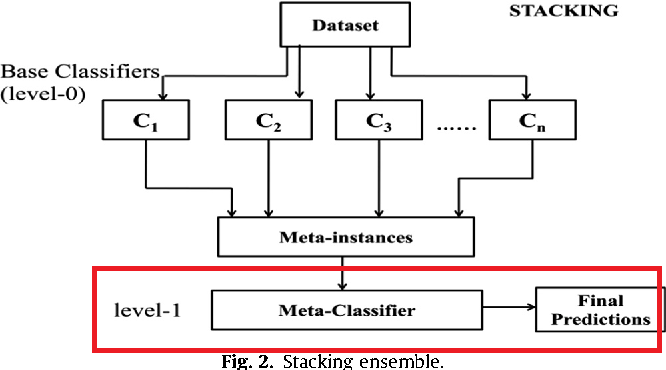

> Indented block



# **MLP Classifier**

In [ ]:
#MLP

from sklearn.neural_network import MLPClassifier

#for i in range(4):
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,test_size = 0.2, random_state=1)   


svclassifier = MLPClassifier(hidden_layer_sizes= (100, 100, 100), alpha= 0.001 , solver='lbfgs', activation = 'tanh', learning_rate = 'constant' )
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print("prediction y pred is: \t", y_pred)
print("y test is:________ \t", y_test)

cm1 = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n",  cm1)
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : \t', accuracy1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : \t', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : \t', specificity1)



prediction y pred is: 	 [1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0]
y test is:________ 	 [1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0]
confusion_matrix: 
 [[ 9  0]
 [ 2 10]]
Accuracy : 	 0.9047619047619048
Sensitivity : 	 1.0
Specificity : 	 0.8333333333333334


# **KNN Classifier**

In [ ]:

#for i in range(4):

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,test_size = 0.2, random_state=1)
#svclassifier = SVC(kernel='poly', C = 1000, gamma = 1, degree=1)
svclassifier = KNeighborsClassifier(n_neighbors=4,leaf_size=2, p=2)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
#print(y_pred)
#print("confusion_matrix:",  i)
cm1 = confusion_matrix(y_test,y_pred)
print("confusion_matrix:",  cm1)
total1=sum(sum(cm1))
Accuracy=(cm1[0,0]+cm1[1,1])/total1
accuracy1 +=[Accuracy]
print ('Accuracy : ', Accuracy)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)




confusion_matrix: [[ 9  0]
 [ 2 10]]
Accuracy :  0.9047619047619048
Sensitivity :  1.0
Specificity :  0.8333333333333334


# **SVM Classifier**

In [ ]:
from sklearn import svm
i=1

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,test_size = 0.2, random_state=1)
#svclassifier = SVC(kernel='poly', C = 1000, gamma = 1, degree=1)
svclassifier = SVC(kernel='rbf', C = 10, gamma = 0.2)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
#print(y_pred)
print("confusion_matrix:",  i)
cm1 = confusion_matrix(y_test,y_pred)
print("confusion_matrix:",  cm1)
total1=sum(sum(cm1))

print("y_test:",  y_test)
print("Prediction:",  y_pred)
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

  

confusion_matrix: 1
confusion_matrix: [[ 9  0]
 [ 1 11]]
y_test: [1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0]
Prediction: [1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0]
Accuracy :  0.9523809523809523
Sensitivity :  1.0
Specificity :  0.9166666666666666


# **ELM Classifier**

In [ ]:


#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state=1)
ELM_model = ELMClassifier(alpha=2e-7, n_neurons=98, ufunc='relu')
ELM_model.fit(X_train,y_train)
ELM_accuracy = ELM_model.score(X_test,y_test)

print('ELM Classifier Accuracy = ',(ELM_accuracy*100))
ELM_pred = ELM_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,ELM_pred)
total1=sum(sum(cf_matrix))
accuracy1=(cf_matrix[0,0]+cf_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

ELM Classifier Accuracy =  90.47619047619048
Accuracy :  0.9047619047619048
Sensitivity :  1.0
Specificity :  0.8333333333333334


# **Random forest classifier**

In [ ]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state=1)
svclassifier = RandomForestClassifier(n_estimators=400, max_features=2, verbose=1,max_depth=6)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
#print(y_pred)
print("confusion_matrix:",  i)
cm1 = confusion_matrix(y_test,y_pred)
print("confusion_matrix:",  cm1)
total1=sum(sum(cm1))
Accuracy=(cm1[0,0]+cm1[1,1])/total1
accuracy1 +=[Accuracy]
print ('Accuracy : ', Accuracy)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print('\n \n best result with 300 estimators is',max(accuracy1))

NameError: ignored

# **XGBClassifier**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier


#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state=1)
xgb_model= XGBClassifier(n_estimators=10,
                         learning_rate=1e-05,
                         max_depth=2)
xgb_model.fit(X_train, y_train)
xgb_accuracy = xgb_model.score(X_test,y_test)
print('XGBoost Classifier Accuracy = ',(xgb_accuracy*100))
y_pred = svclassifier.predict(X_test)
#print(y_pred)
print("confusion_matrix:",  i)
cm1 = confusion_matrix(y_test,y_pred)
print("confusion_matrix:",  cm1)
total1=sum(sum(cm1))
Accuracy=(cm1[0,0]+cm1[1,1])/total1
accuracy1 +=[Accuracy]
print ('Accuracy : ', Accuracy)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print('\n \n best result with 300 estimators is',max(accuracy1))

XGBoost Classifier Accuracy =  85.71428571428571
confusion_matrix: 1
confusion_matrix: [[ 8  1]
 [ 2 10]]
Accuracy :  0.8571428571428571
Sensitivity :  0.8888888888888888
Specificity :  0.8333333333333334

 
 best result with 300 estimators is 8.57142857142857


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


(99, 2)
(99,)
